# Proyecto 1 (Inteligencia de Negocios)

## Roles

- Rol --- Juan Nicolas Suarez
- Rol --- David Santiago Carillo
- Rol --- 



## Objetivo principal del proyecto

- Vincular de forma automática las opiniones de la ciudadanía con los Objetivos de Desarrollo
Sostenible (ODS) 1, 3 y 4

    **1.“Fin de la pobreza”** 

    **3.“Salud y bienestar”**

    **4.“Educación de calidad”**

## Etapa 1 del Proyecto

## Objetivo Etapa 1
- Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.


## Tareas

1. Canvas de aprendizaje automatico

## Modelo de Machine Learning

### 1. Instalacion e importacion de librerias

In [76]:
#!pip uninstall -y pandas-profiling


In [77]:
#!pip install -U "visions[type_image_path]>=0.7.5,<0.8.2"


In [78]:
#!pip install -U ydata-profiling

In [79]:
#!pip install numba==0.56.4


In [80]:
%pip install "numpy==1.26.4"

%pip install nltk "spacy<3.8"




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [81]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------- ----------------------- 5.2/12.9 MB 31.9 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.9 MB 29.6 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 27.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [82]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### 1.1 Descargar Stopwords y lema de palabras

In [84]:
# StopWords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
#WordNetLemmatizer (lema)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [86]:
# Instalación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import spacy
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay , roc_curve, roc_auc_score

from collections import Counter


from sklearn.base import BaseEstimator, ClassifierMixin
#from ydata_profiling import ProfileReport 
import matplotlib.pyplot as plt

In [87]:
print(spacy.__version__)


3.7.5


### 2.Perfilamiento y entendmiento de los datos

### 2.1 Lectura de los datos

In [88]:
df_text = pd.read_excel('data/Datos_proyecto.xlsx' )
df_textC = df_text

In [89]:
df_textC

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


In [90]:
df_textC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


### 2.2 Estadisticas Descriptivas
Vamos a analizar los textos por medio de **maximo** , **minimo** y **moda** 

In [91]:
from collections import Counter

texts = df_textC.copy()
texts['Count'] = [len(x) for x in texts['textos']]
texts['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in texts['textos']]
texts['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in texts['textos']]
texts["Moda"] = [Counter(i.split(" ")).most_common(1)[0][0] for i in texts["textos"] ]
#ProfileReport(texts)

In [92]:
texts

,textos,labels,Count,Max,Min,Moda
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1,de
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1,y
2,"Además, la formación de especialistas en medic...",3,659,15,1,de
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1,de
4,Este grupo se centró en las personas que padec...,3,608,14,0,de
...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1,de
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1,de
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1,el
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1,el


### Distribucion de la variable labels

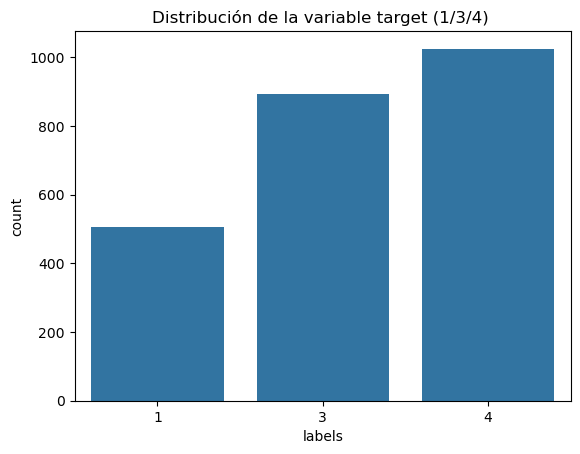

In [93]:
sns.countplot(x="labels", data=df_textC)
plt.title("Distribución de la variable target (1/3/4) ")
plt.show()

Como podemos ver hay una diferencia notable del label 1 ("Fin de la pobreza") con respecto a las demas . Modelaremos asi para pobrar como se comporta el modelo.

### 3. Preparación de datos

### 3.1 Limpieza de datos

In [94]:
"""Remove non-ASCII characters from list of tokenized words"""
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

"""Convert all characters to lowercase from list of tokenized words """
def to_lowercase(words):
    return [ word.lower() for word in words]

"""Remove punctuation from list of tokenized words"""
def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

"""Remove stop words from list of tokenized words"""
def remove_stopwords(words):
    stop_words = set(stopwords.words("spanish"))
    return [w for w in words if w.lower() not in stop_words]
  
"""Make all transformations to text"""
def preprocessing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words






### 3.2 Tokenizacion
Obtenemos todas las palabras separadas para usarlo en el analisis

In [95]:
df_textC['palabras'] = df_textC['textos'].apply(word_tokenize)

df_textC.head()


,textos,labels,palabras
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


Le aplicamos el procesamiento para quitar puntuaciones , stopwords y pasar todas las palabras a minuscula.

In [96]:
df_textC['palabrasProces'] = df_textC['palabras'].apply(preprocessing)

df_textC.head()

,textos,labels,palabras,palabrasProces
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,..."


### 3.2 Normalizacion

In [97]:
import spacy
# Stemmer para palabras en español
stemmer = SnowballStemmer("spanish")

# Load spaCy Spanish model
nlp = spacy.load("es_core_news_sm")



def stem_words(words):
    """Stem words in list of tokenized words (Spanish)."""
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Lemmatize words in list of tokenized words (Spanish)."""
    doc = nlp(" ".join(words))
    # Return lemmas, focusing on verbs (if you want *all words*, remove the if check)
    return [token.lemma_ for token in doc]

def stem_and_lemmatize(words):
    """Combine stems and lemmas (verbs) if needed."""
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

df_textC['palabras']=df_textC['palabrasProces'].apply(stem_and_lemmatize)

df_textC.head()

,textos,labels,palabras,palabrasProces
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[aprendizaj, educ, consider, sinon, escolariz,...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[nin, mas, pequen, beb, nin, pequen, capacit, ...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[adem, formacion, especial, medicin, general, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[pais, ocde, tiend, pas, curs, obligatori, opt...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[grup, centr, person, padec, trastorn, mental,...","[grupo, centro, personas, padecen, trastornos,..."


In [98]:
df_textC.sample(20)

,textos,labels,palabras,palabrasProces
137,También detalla un conjunto integral de políti...,4,"[tambi, detall, conjunt, integral, polit, prac...","[tambien, detalla, conjunto, integral, politic..."
1566,"Además, dado que los presupuestos quinquenales...",4,"[adem, dad, presupuest, quinquenal, implic, pl...","[ademas, dado, presupuestos, quinquenales, imp..."
1099,"Alternativamente, los prioritarios racionaliza...",1,"[altern, prioritari, racionaliz, graduacion, o...","[alternativamente, prioritarios, racionalizan,..."
654,"Sin embargo, la proporción del pago de bolsill...",3,"[embarg, proporcion, pag, bolsill, product, fa...","[embargo, proporcion, pago, bolsillo, producto..."
2376,Parte de los 400 millones de libras esterlinas...,3,"[part, 400, millon, libr, esterlin, compromet,...","[parte, 400, millones, libras, esterlinas, com..."
712,Los únicos profesores a los que se da la opció...,4,"[unic, profesor, da, opcion, incorpor, nuev, s...","[unicos, profesores, da, opcion, incorporarse,..."
426,"Además, los estudiantes en escuelas de clases ...",4,"[adem, estudi, escuel, clas, pequen, tiend, su...","[ademas, estudiantes, escuelas, clases, pequen..."
799,Una gran parte de la ganancia en la esperanza ...,3,"[gran, part, gananci, esper, vid, sid, despu, ...","[gran, parte, ganancia, esperanza, vida, sido,..."
1193,¿Qué ventajas tiene para los alumnos trabajar ...,4,"[ventaj, alumn, trabaj, distint, estrategi, di...","[ventajas, alumnos, trabajar, distintas, estra..."
770,"Por lo tanto, las microfinanzas están teniendo...",1,"[microfin, estan, impact, moderniz, inclus, si...","[microfinanzas, estan, impacto, modernizador, ..."


### 3.3 Entrenamiento y split de los datos para testing

In [99]:
X = df_textC["palabras"]                 # list of tokens per row
y = df_textC["labels"].astype(int)     # already numeric; ensure int dtype

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 3.4 Vectorizar texto ya tokenizado

 TF-IDF : Term Frequency-Inverse Document Frequency

In [100]:
identity = lambda x: x
vec_tfidf = TfidfVectorizer(
    tokenizer=identity, preprocessor=identity, token_pattern=None,
    # sublinear_tf=True, min_df=2, ngram_range=(1,2)
)

X_train_tfidf = vec_tfidf.fit_transform(X_train)
X_test_tfidf  = vec_tfidf.transform(X_test)



### 4.1 Entrenar primer modelo de clasificacion

#### 4.1.1 Regresion Logistica (Juan Nicolas)

In [101]:


clf = LogisticRegression(max_iter=200, n_jobs=None)  
clf.fit(X_train_tfidf, y_train)


# Evaluación en TRAIN
y_train_pred = clf.predict(X_train_tfidf)
print("TRAIN:")
print(classification_report(y_train, y_train_pred, digits=3))

# Evaluación en TEST
y_test_pred = clf.predict(X_test_tfidf)
print("TEST:")
print(classification_report(y_test, y_test_pred, digits=3))


TRAIN:
              precision    recall  f1-score   support

           1      1.000     0.990     0.995       404
           3      0.997     0.996     0.997       715
           4      0.993     0.999     0.996       820

    accuracy                          0.996      1939
   macro avg      0.997     0.995     0.996      1939
weighted avg      0.996     0.996     0.996      1939

TEST:
              precision    recall  f1-score   support

           1      0.969     0.921     0.944       101
           3      0.961     0.966     0.964       179
           4      0.962     0.980     0.971       205

    accuracy                          0.963       485
   macro avg      0.964     0.956     0.960       485
weighted avg      0.963     0.963     0.963       485



1. Como podemos ver el modelo parece estar bien ya que el acuracy tanto en el training como en el test dan muy similares , por lo que no hay inconsistencias .
2. Tambien se puede observar que entre el modelo entre clases esta tieniendo un accuracy muy similar. 
3. El modelo esta dando un accuracy alto para revisar que no sea por la eleccion de los datos de training y de test se probara con cross validation.
4. Se creara un modelo con los datos mas balanceados para evitar que el modelo se aprenda los datos.

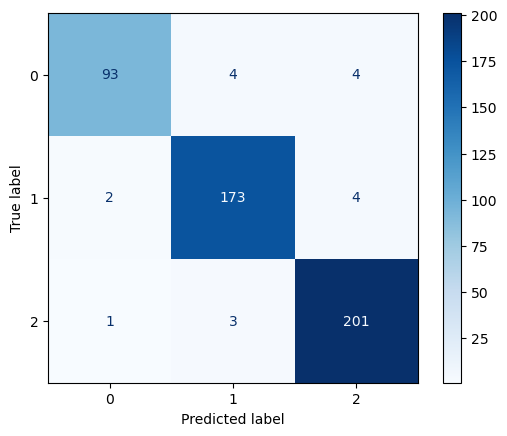

In [102]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 4.2 Mismo modelo (Regresion logistica)

#### 4.22  Regresion logistica con cross validation


In [103]:
# Define el pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)),  # Vectorización TF-IDF
    ('clf', LogisticRegression(max_iter=200))  # Modelo de regresión logística
])

# Cross-validation (5 pliegues)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')  # Cambia 'accuracy' por otra métrica si quieres

# Resultados
print(f"Cross-validation scores: {cv_scores}")
print(f"Promedio del accuracy (CV): {cv_scores.mean():.3f}")

Cross-validation scores: [0.96494845 0.97938144 0.95670103 0.97525773 0.9731405 ]
Promedio del accuracy (CV): 0.970


Como podemos ver los resultados del primer modelo si tienen sentido. el promedio del accurracy no varia mucho.

A pesar de que esta dando buenos resultados el modelo , decidimos balancear la clase minoritaria para evitar overfitting del modelo.

### 4.2 Mismo modelo (Regresion logistica)

#### 4.2.1  Regresion logistica con SMOTE



In [104]:
X = df_textC["palabras"]
y = df_textC["labels"].astype(int)

# 1. Vectorización de los textos (TF-IDF)
tfidf = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)
X_tfidf = tfidf.fit_transform(X)

# 2. División en train y test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


#### 4.2.2  Aplicacion de SMOTE


In [107]:
# 3. Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Ver las clases antes y después de aplicar SMOTE
print(f"Distribución de clases antes de SMOTE:\n{y_train.value_counts()}")
print(f"Distribución de clases después de SMOTE:\n{y_train_res.value_counts()}")

Distribución de clases antes de SMOTE:
labels
4    820
3    715
1    404
Name: count, dtype: int64
Distribución de clases después de SMOTE:
labels
1    820
4    820
3    715
Name: count, dtype: int64


In [108]:
# 4. Entrenar el modelo con Logistic Regression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_res, y_train_res)

# 5. Evaluación del modelo sobre el conjunto de prueba (test)
y_pred = clf.predict(X_test)

# Resultados de clasificación
print("=== Resultados del modelo ===")
print(classification_report(y_test, y_pred, digits=3))

=== Resultados del modelo ===
              precision    recall  f1-score   support

           1      0.960     0.941     0.950       101
           3      0.966     0.966     0.966       179
           4      0.966     0.976     0.971       205

    accuracy                          0.965       485
   macro avg      0.964     0.961     0.962       485
weighted avg      0.965     0.965     0.965       485

